<a href="https://colab.research.google.com/github/c0upsattaca/Lung-Cancer-Detection-using-CNN-models/blob/main/LungCancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!unzip /content/drive/MyDrive/Datasetlungcancer.zip

unzip:  cannot find or open /content/drive/MyDrive/Datasetlungcancer.zip, /content/drive/MyDrive/Datasetlungcancer.zip.zip or /content/drive/MyDrive/Datasetlungcancer.zip.ZIP.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import math
import shutil
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, Lambda, BatchNormalization, MaxPooling2D
from keras.models import load_model , Model
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras.applications.inception_v3 import InceptionV3 , preprocess_input

from keras.layers import Input, Lambda, Dense, Flatten
from keras.applications import EfficientNetB0

In [ ]:
ROOT_DIR = "/content/Data"
train_path = "/content/Data/train"
validate_path = "/content/Data/valid"
test_path = "/content/Data/test"


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Define preprocessing functions
def preprocessingImages1(path):
    image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, preprocessing_function= preprocess_input, horizontal_flip=True)
    image = image_data.flow_from_directory(directory=path, target_size=(224, 224), batch_size=32, class_mode='categorical')
    return image

def preprocessingImages2(path):
    image_data = ImageDataGenerator(preprocessing_function= preprocess_input)
    image = image_data.flow_from_directory(directory=path, target_size=(224, 224), batch_size=32, class_mode='categorical')
    return image

In [ ]:
# Get data generators
train_data = preprocessingImages1(train_path)
test_data = preprocessingImages2(test_path)
validate_data = preprocessingImages2(validate_path)

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [ ]:
train_data.class_indices

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [ ]:
base_model= MobileNet(input_shape=(224,224,3), include_top= False)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
#base_model.summary()

In [ ]:
X= Flatten()(base_model.output)
x= Dense(units=4,activation='softmax')(X)

model_mn= Model(base_model.input, x)
model_mn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [ ]:
import tensorflow as tf
from tensorflow import keras
model_mn.compile(optimizer='rmsprop', loss= keras.losses.categorical_crossentropy, metrics=['accuracy','precision','recall','AUC'])

In [ ]:
from keras.callbacks import ModelCheckpoint , EarlyStopping
es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=3, verbose=1)
mc = ModelCheckpoint(filepath="./bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only=True)
cb = [es, mc]

In [ ]:
#Train the model
hist = model_mn.fit_generator(generator=train_data, steps_per_epoch=20, epochs=30, verbose=1,
                         validation_data=validate_data, validation_steps=3,
                         callbacks=cb)

Epoch 1/30
20/20 [==============================] - ETA: 0s - loss: 19.1804 - accuracy: 0.4927
Epoch 1: val_accuracy improved from -inf to 0.54167, saving model to ./bestmodel.h5
20/20 [==============================] - 17s 549ms/step - loss: 19.1804 - accuracy: 0.4927 - val_loss: 17.8506 - val_accuracy: 0.5417
Epoch 2/30
20/20 [==============================] - ETA: 0s - loss: 7.8022 - accuracy: 0.6493
Epoch 2: val_accuracy did not improve from 0.54167
20/20 [==============================] - 10s 512ms/step - loss: 7.8022 - accuracy: 0.6493 - val_loss: 14.8021 - val_accuracy: 0.5139
Epoch 3/30
20/20 [==============================] - ETA: 0s - loss: 4.9446 - accuracy: 0.7504
Epoch 3: val_accuracy did not improve from 0.54167
20/20 [==============================] - 10s 507ms/step - loss: 4.9446 - accuracy: 0.7504 - val_loss: 8.7706 - val_accuracy: 0.5278
Epoch 4/30
20/20 [==============================] - ETA: 0s - loss: 3.7327 - accuracy: 0.7961
Epoch 4: val_accuracy improved from 0.

In [ ]:
#transfer learning or hyperparamter tuninmg ---- in using keras.tuner
#transfer learning--- tranfer knowledge one model to another
#resnet
#lenet
#mobilenet

#load the best fit model

model = load_model("/content/bestmodel.h5")

In [ ]:
accuracy_mobnet = model_mn.evaluate_generator(test_data)[1]
print(f'Accuracy:{accuracy_mobnet}')

Accuracy:0.6730158925056458


In [ ]:
h= hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

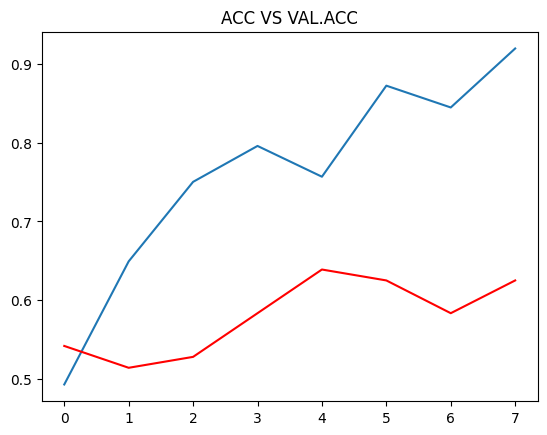

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")

plt.title("ACC VS VAL.ACC")
plt.show()

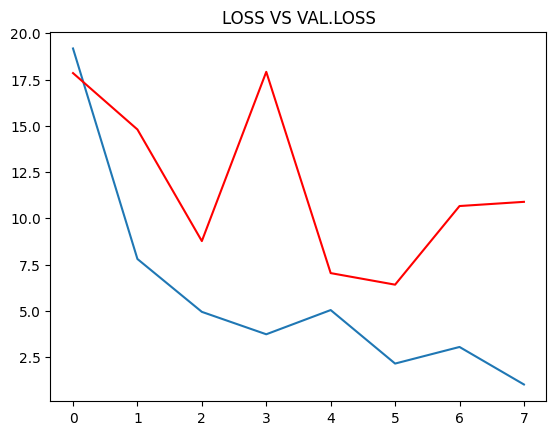

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")

plt.title("LOSS VS VAL.LOSS")
plt.show()

1/1 [==============================] - 1s 737ms/step
THE UPLOADED IMAGE IS SUSPECTED AS: Adenocarcinoma


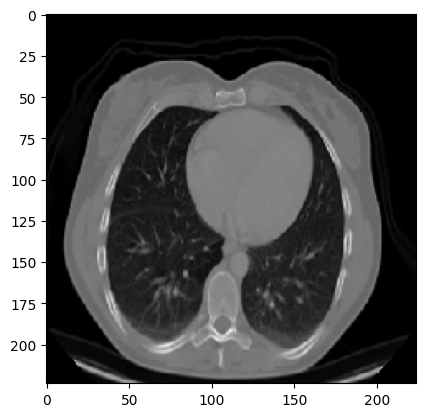

In [ ]:
from keras.preprocessing import image
img = image.load_img('/content/Datasetlungcancer/test/adenocarcinoma/000108 (3).png',target_size=(224,224))
imag = image.img_to_array(img)
imag = preprocess_input(imag)

input_arr = np.array([imag])

a=np.argmax(model.predict(input_arr),-1)
if a==0:
      op="Adenocarcinoma"
elif a==1:
      op="large cell carcinoma"
elif a==2:
      op="normal (void of cancer)"
else:
      op="squamous cell carcinoma"
plt.imshow(img)
print("THE UPLOADED IMAGE IS SUSPECTED AS: "+str(op))

INCEPTION_V3

In [ ]:
from keras.applications.inception_v3 import InceptionV3 , preprocess_input
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Input, Lambda, Dense, Flatten

In [ ]:
inception_v3 = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
inception_v3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalizati

In [ ]:
for layer in inception_v3.layers[: -15]:
    layer.trainable = False

In [ ]:
x = inception_v3.output
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)

output = Dense(units=4, activation='softmax')(x)
model = Model(inception_v3.input, output)

model.summary()



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0]

In [ ]:


model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:

es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=3, verbose=1)
mc = ModelCheckpoint(filepath="./bestmodel2.h5", monitor="val_accuracy", verbose=1, save_best_only=True)
cb = [es, mc]

In [ ]:
hit = model.fit_generator(generator=train_data, steps_per_epoch=20, epochs=50, verbose=1,
                         validation_data=validate_data, validation_steps=3,
                         callbacks=cb)

Epoch 1/50
20/20 [==============================] - ETA: 0s - loss: 12.1213 - accuracy: 0.4046
Epoch 1: val_accuracy improved from -inf to 0.47222, saving model to ./bestmodel2.h5
20/20 [==============================] - 29s 886ms/step - loss: 12.1213 - accuracy: 0.4046 - val_loss: 3.7428 - val_accuracy: 0.4722
Epoch 2/50
20/20 [==============================] - ETA: 0s - loss: 3.2491 - accuracy: 0.5400
Epoch 2: val_accuracy improved from 0.47222 to 0.51389, saving model to ./bestmodel2.h5
20/20 [==============================] - 12s 627ms/step - loss: 3.2491 - accuracy: 0.5400 - val_loss: 1.4075 - val_accuracy: 0.5139
Epoch 3/50
20/20 [==============================] - ETA: 0s - loss: 1.1770 - accuracy: 0.6232
Epoch 3: val_accuracy improved from 0.51389 to 0.56944, saving model to ./bestmodel2.h5
20/20 [==============================] - 12s 612ms/step - loss: 1.1770 - accuracy: 0.6232 - val_loss: 1.0255 - val_accuracy: 0.5694
Epoch 4/50
20/20 [==============================] - ETA: 0s

In [ ]:

model = load_model("/content/bestmodel2.h5")

In [ ]:
accuracy_incep = model.evaluate_generator(test_data)[1]
print(f'Accuracy:{accuracy_incep}')

Accuracy:0.7174603343009949


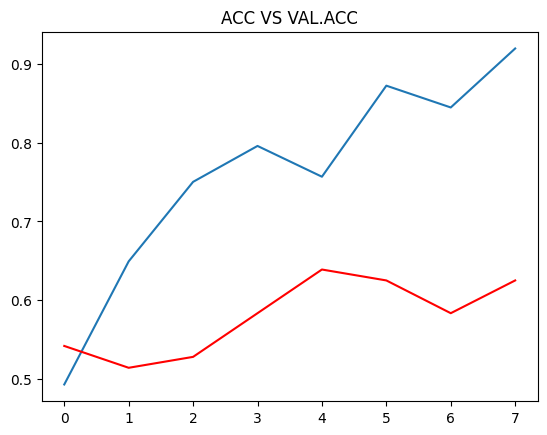

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")

plt.title("ACC VS VAL.ACC")
plt.show()

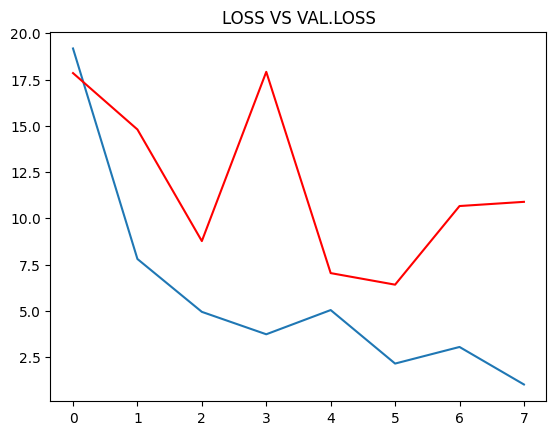

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")

plt.title("LOSS VS VAL.LOSS")
plt.show()

1/1 [==============================] - 3s 3s/step
THE UPLOADED IMAGE IS SUSPECTED AS: Adenocarcinoma


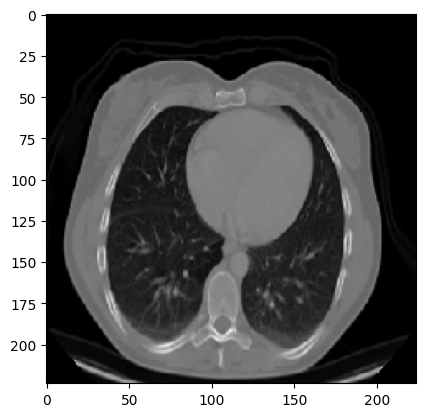

In [ ]:
from keras.preprocessing import image
img = image.load_img('/content/Datasetlungcancer/test/adenocarcinoma/000108 (3).png',target_size=(224,224))
imag = image.img_to_array(img)
imag = preprocess_input(imag)

input_arr = np.array([imag])

a=np.argmax(model.predict(input_arr),-1)
if a==0:
      op="Adenocarcinoma"
elif a==1:
      op="large cell carcinoma"
elif a==2:
      op="normal (void of cancer)"
else:
      op="squamous cell carcinoma"
plt.imshow(img)
print("THE UPLOADED IMAGE IS SUSPECTED AS: "+str(op))

## **VGG16**


In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
VGG16_model = VGG16(
    include_top = False,
    weights="imagenet",
    input_shape = (224,224,3)
)
for layer in VGG16_model.layers :
  layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
from keras.src.metrics.confusion_metrics import activations
from keras.models import Sequential
model = Sequential()
model.add(VGG16_model)
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 batch_normalization (Batch  (None, 7, 7, 512)         2048      
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 512)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 1024)              4719616   
                                                                 
 dropout (Dropout)           (None, 1024)              0

In [ ]:
import tensorflow as tf
model.compile(
    optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']
)
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath='bestmodel5.h5',monitor='val_accuracy',save_best_only=True),
]
# tf.keras.callbacks.TensorBoard(log_dir='logs')
# tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5)

In [ ]:
results = model.fit(train_data,validation_data=validate_data,epochs=50,verbose = 1,callbacks = callbacks)

# vgg = model.fit_generator(
#     train_data,

#     epochs = 32,
#     verbose = 1,
#     validation_data = validate_data,
#     validation_steps = len(validate_data),
#     callbacks = cb
# )
# histo = model.fit_generator(generator=train_data, steps_per_epoch=20, epochs=32, verbose=1,
#                          validation_data=validate_data, validation_steps=len(validate_data),
#                          callbacks=cb)

Epoch 1/50
20/20 [==============================] - 13s 556ms/step - loss: 0.1301 - accuracy: 0.9511 - val_loss: 0.9345 - val_accuracy: 0.8194
Epoch 2/50
20/20 [==============================] - 10s 494ms/step - loss: 0.1399 - accuracy: 0.9641 - val_loss: 1.6137 - val_accuracy: 0.8194
Epoch 3/50
20/20 [==============================] - 13s 614ms/step - loss: 0.1832 - accuracy: 0.9429 - val_loss: 0.9756 - val_accuracy: 0.8472
Epoch 4/50
20/20 [==============================] - 11s 548ms/step - loss: 0.0862 - accuracy: 0.9706 - val_loss: 0.6229 - val_accuracy: 0.8889
Epoch 5/50
20/20 [==============================] - 11s 539ms/step - loss: 0.1197 - accuracy: 0.9625 - val_loss: 0.5441 - val_accuracy: 0.8750
Epoch 6/50
20/20 [==============================] - 13s 630ms/step - loss: 0.0760 - accuracy: 0.9772 - val_loss: 0.8635 - val_accuracy: 0.8889
Epoch 7/50
20/20 [==============================] - 10s 501ms/step - loss: 0.0843 - accuracy: 0.9755 - val_loss: 0.8852 - val_accuracy: 0.8611

In [ ]:
# Loading the Best Fit Model
model = load_model("./bestmodel5.h5")

# Checking the Accuracy of the Model
accuracy_vgg = model.evaluate_generator(generator= test_data)[1]
print(f"The accuracy of the model is = {accuracy_vgg*100} %")
loss_vgg = model.evaluate_generator(generator= test_data)[0]
print(f"The loss of the model is = {loss_vgg}")

The accuracy of the model is = 83.49206447601318 %
The loss of the model is = 0.7213467359542847


In [ ]:
h=results.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

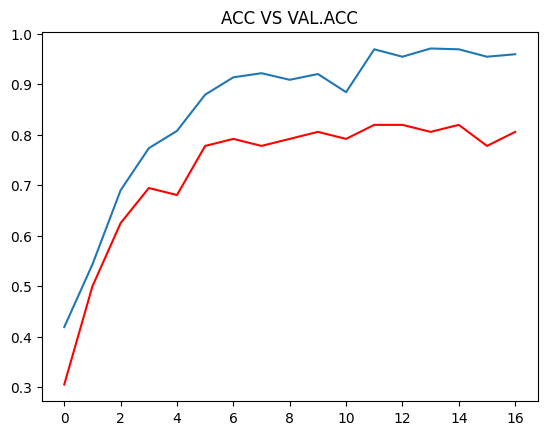

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")

plt.title("ACC VS VAL.ACC")
plt.show()

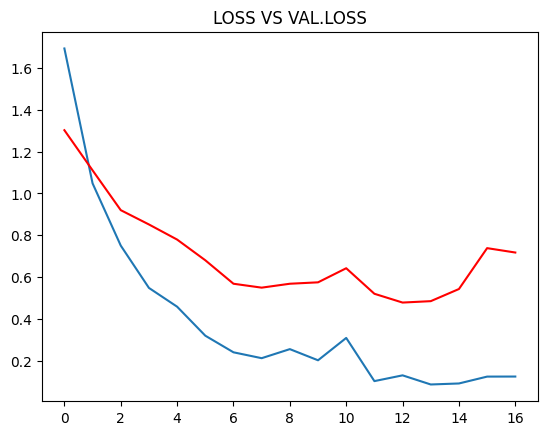

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")

plt.title("LOSS VS VAL.LOSS")
plt.show()

1/1 [==============================] - 0s 29ms/step
THE UPLOADED IMAGE IS SUSPECTED AS: Adenocarcinoma


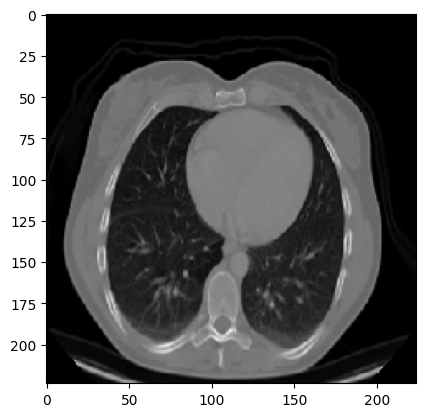

In [ ]:
from keras.preprocessing import image
img = image.load_img('/content/Datasetlungcancer/test/adenocarcinoma/000108 (3).png',target_size=(224,224))
imag = image.img_to_array(img)
imag = preprocess_input(imag)/255

input_arr = np.array([imag])

a=np.argmax(model.predict(input_arr),-1)
if a==0:
      op="Adenocarcinoma"
elif a==1:
      op="large cell carcinoma"
elif a==2:
      op="normal (void of cancer)"
else:
      op="squamous cell carcinoma"
plt.imshow(img)
print("THE UPLOADED IMAGE IS SUSPECTED AS: "+str(op))

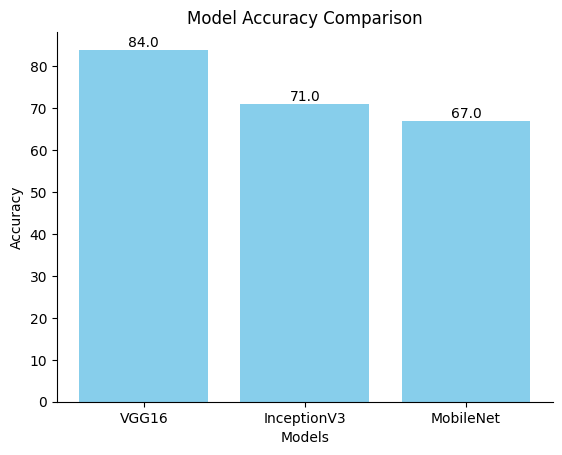

In [ ]:
algos = ['VGG16', 'InceptionV3', 'MobileNet']
accuracy = [accuracy_vgg, accuracy_incep, accuracy_mobnet]
accuracy = np.floor([i * 100 for i in accuracy])


fig, ax = plt.subplots()
bars = ax.bar(algos, accuracy, color='skyblue')

# Add data values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


plt.show()

In [ ]:
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
from keras.utils import to_categorical
import seaborn as sns

10/10 [==============================] - 2s 201ms/step
Classification Report:
                         precision    recall  f1-score   support

         adenocarcinoma       0.38      0.47      0.42       120
   large.cell.carcinoma       0.20      0.20      0.20        51
                 normal       0.15      0.15      0.15        54
squamous.cell.carcinoma       0.35      0.26      0.29        90

               accuracy                           0.31       315
              macro avg       0.27      0.27      0.27       315
           weighted avg       0.30      0.31      0.30       315



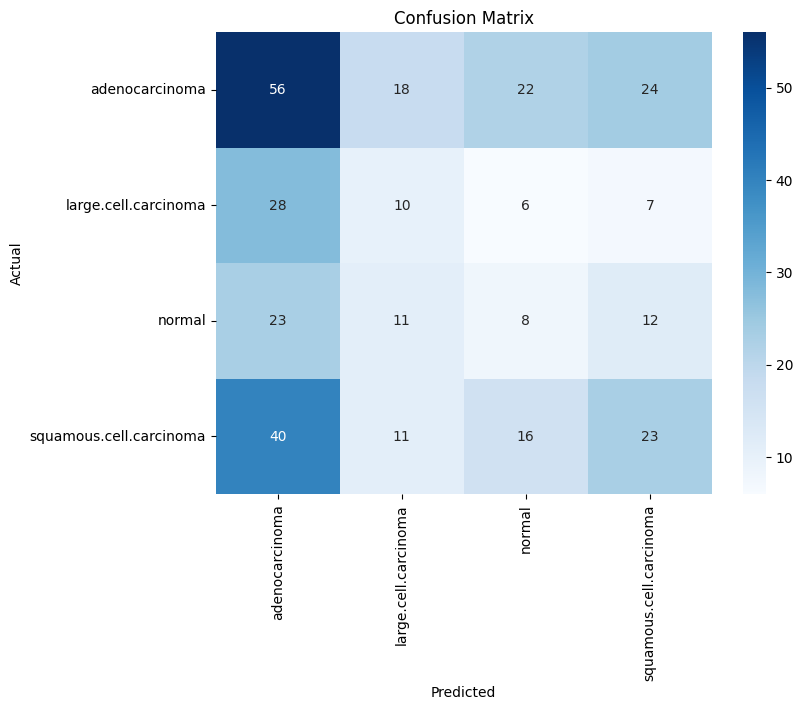

In [ ]:
predictions = model.predict(test_data)
y_pred = np.argmax(predictions, axis=1)
y_true = test_data.classes

# Classification report
class_names = list(test_data.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:")
print(report)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
